GROWTH MODEL FOR TOBACCO USERS
Odalys Benitez and Austin Veseliza



In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
import matplotlib.pyplot as plt


# import functions from the modsim.py module
from modsim import *

In [2]:
from pandas import read_csv

The data directory contains a downloaded copy of https://en.wikipedia.org/wiki/World_population_estimates

The arguments of `read_html` specify the file to read and how to interpret the tables in the file.  The result, `tables`, is a sequence of `DataFrame` objects; `len(tables)` reports the length of the sequence.

In [3]:
filename = 'data/Adult_Tobacco_Consumption_In_The_U.S.__2000-Present.csv'
data = read_csv(filename, header=0)
relevant_rows= data[0:16]
relevant_data = relevant_rows[['Year', 'Total Per Capita']]
#data_timeseries = TimeSeries()
relevant_data.set_index('Year', inplace=True)
year = relevant_data.index
totalpc = relevant_data['Total Per Capita']



Year
2000    2148
2001    2075
2002    2006
2003    1916
2004    1888
2005    1807
2006    1787
2007    1690
2008    1615
2009    1472
2010    1400
2011    1374
2012    1342
2013    1277
2014    1216
2015    1217
Name: Total Per Capita, dtype: int64

We can select the `DataFrame` we want using the bracket operator.  The tables are numbered from 0, so `tables[2]` is actually the third table on the page.

`head` selects the header and the first five rows.

Saving figure to file figs/chap03-fig01.pdf


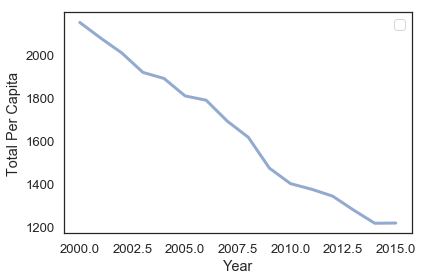

In [4]:
plot(year, totalpc)
decorate(xlabel='Year',
         ylabel='Total Per Capita')#add units
savefig('figs/chap03-fig01.pdf')  

In [5]:
t_0 = get_first_label(relevant_data)
t_end = get_last_label(relevant_data)
elapsed_time = t_end - t_0
p_0 = get_first_value(relevant_data)
p_end = get_last_value(relevant_data)
total_growth = p_end - p_0



annual_growth = total_growth / elapsed_time

array([-62.06666667])

In [6]:
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                annual_growth=annual_growth)



,values
t_0,2000
t_end,2015
p_0,[2148]
annual_growth,[-62.06666666666667]


Here's what the DataFrame looks like now.  

In [7]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

In [8]:
def linear_update_func(pop, t, system):
        
    return pop + system.annual_growth

In [9]:
def proportional_update_func(pop, t, system):
    
    net_growth = system.prop_alpha * pop
    
    return pop + net_growth
    

In [10]:
def piecewise_proportional_update_func(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year"""
    if (t <= 2007):
        net_growth = system.prop_alpha1  * pop
    if (t > 2007 and t < 2010):
        net_growth = system.prop_alpha2 * pop
    if (t > 2009):
        net_growth = system.prop_alpha3 * pop  
    
        
    return pop + net_growth

In [11]:
def quadratic_update_func(pop, t, system):
    
    net_growth = system.quad_alpha * pop + system.quad_beta * pop**2
    
    return pop + net_growth

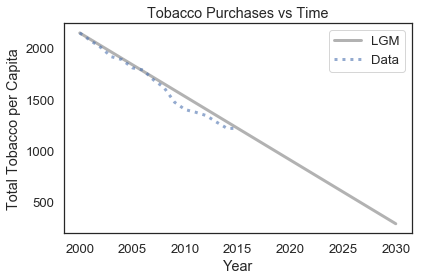

In [12]:
system.t_end=2030

results = run_simulation(system, linear_update_func)
plot(results, color='gray', label='LGM')
plot(year, totalpc, ':', label='Data')
decorate(xlabel='Year', 
         ylabel='Total Tobacco per Capita',
         title='Tobacco Purchases vs Time')

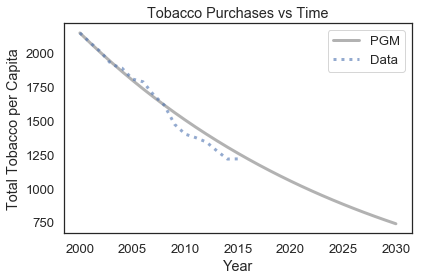

In [13]:
system.prop_alpha = -0.035

results = run_simulation(system, proportional_update_func)
plot(results, color='gray', label='PGM')
plot(year, totalpc, ':', label='Data')
decorate(xlabel='Year', 
         ylabel='Total Tobacco per Capita',
         title='Tobacco Purchases vs Time')

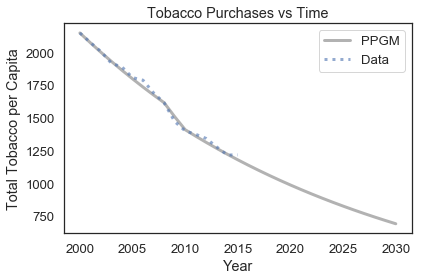

In [14]:
system.prop_alpha1 = -0.035
system.prop_alpha2 = -0.066
system.prop_alpha3 = -0.035

results = run_simulation(system, piecewise_proportional_update_func)
plot(results, color='gray', label='PPGM')
plot(year, totalpc, ':', label='Data')
decorate(xlabel='Year', 
         ylabel='Total Tobacco per Capita',
         title='Tobacco Purchases vs Time')

In [ ]:
system.quad_alpha = 0.02
system.quad_beta = -0.000032

results = run_simulation(system, quadratic_update_func)
plot(results, color='gray', label='QGM')
plot(year, totalpc, ':', label='Data')
decorate(xlabel='Year', 
         ylabel='Total Tobacco per Capita',
         title='Tobacco Purchases vs Time')